In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load Dataset
data_path = 'Austin_Animal_Center_Outcomes_20241205.csv'
data = pd.read_csv(data_path)

# Drop unnecessary columns
data_cleaned = data.drop(columns=['Name', 'Animal ID', 'Outcome Subtype'], errors='ignore')

# Handle missing values (if any remain after dropping columns)
data_cleaned = data_cleaned.dropna()
print("Initial Data Info:\n", data_cleaned.info())



<class 'pandas.core.frame.DataFrame'>
Int64Index: 169314 entries, 0 to 169365
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   DateTime          169314 non-null  object
 1   MonthYear         169314 non-null  object
 2   Date of Birth     169314 non-null  object
 3   Outcome Type      169314 non-null  object
 4   Animal Type       169314 non-null  object
 5   Sex upon Outcome  169314 non-null  object
 6   Age upon Outcome  169314 non-null  object
 7   Breed             169314 non-null  object
 8   Color             169314 non-null  object
dtypes: object(9)
memory usage: 12.9+ MB
Initial Data Info:
 None


In [9]:
# Encode categorical variables
label_encoders = {}
for column in data_cleaned.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data_cleaned[column] = le.fit_transform(data_cleaned[column])
    label_encoders[column] = le


Initial Model Accuracy: 0.7283465729557334
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.92      0.82     16403
           1       0.28      0.04      0.07       306
           2       0.42      0.10      0.16       169
           3       0.86      0.56      0.68      2132
           4       0.00      0.00      0.00         1
           5       1.00      0.14      0.25        14
           6       0.00      0.00      0.00         7
           7       0.55      0.38      0.45      4989
           8       0.50      0.02      0.03       230
           9       0.00      0.00      0.00         1
          10       0.74      0.67      0.70      9611

    accuracy                           0.73     33863
   macro avg       0.46      0.26      0.29     33863
weighted avg       0.72      0.73      0.71     33863



C:\Users\NewMoon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\NewMoon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\NewMoon\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


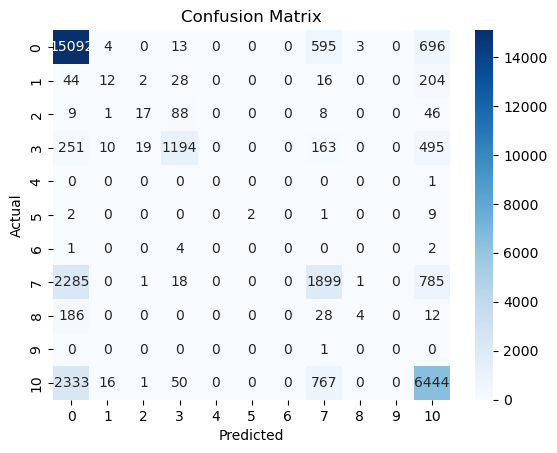

In [10]:
# Feature selection
X = data_cleaned.drop('Outcome Type', axis=1, errors='ignore')  # Replace 'Outcome Type' with actual target column
y = data_cleaned['Outcome Type']

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model Training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Initial Evaluation
y_pred = model.predict(X_test)
initial_accuracy = accuracy_score(y_test, y_pred)
print("Initial Model Accuracy:", initial_accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



In [13]:
from sklearn.model_selection import RandomizedSearchCV
# Hyperparameter Optimization
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_grid,
    n_iter=20,  # Number of random combinations to try
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)
grid_search.fit(X_train, y_train)

# Optimized Model Evaluation
optimized_model = grid_search.best_estimator_
y_pred_optimized = optimized_model.predict(X_test)
optimized_accuracy = accuracy_score(y_test, y_pred_optimized)
print("Optimized Model Accuracy:", optimized_accuracy)
print("Best Parameters:", grid_search.best_params_)

# Documentation of Model Optimization
optimization_results = pd.DataFrame(grid_search.cv_results_)
optimization_results.to_csv('optimization_results1.csv', index=False)


C:\Users\NewMoon\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 16 is smaller than n_iter=20. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\NewMoon\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Optimized Model Accuracy: 0.7297345185010188
Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}


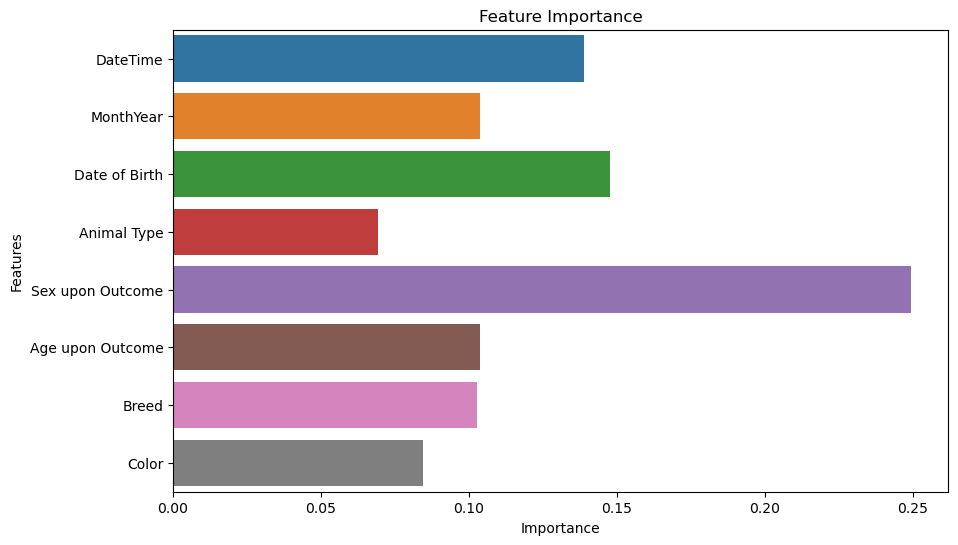

Initial Accuracy: 0.7283465729557334
Optimized Accuracy: 0.7297345185010188
Feature Importances:
 {'DateTime': 0.13898483750592433, 'MonthYear': 0.10365431377548145, 'Date of Birth': 0.14759152184381685, 'Animal Type': 0.06916472151365977, 'Sex upon Outcome': 0.2493941680751717, 'Age upon Outcome': 0.10382810951893298, 'Breed': 0.10281183962655453, 'Color': 0.08457048814045849}


In [14]:
# Visualizations
feature_importances = optimized_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Final Summary
print("Initial Accuracy:", initial_accuracy)
print("Optimized Accuracy:", optimized_accuracy)
print("Feature Importances:\n", dict(zip(features, feature_importances)))